In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.pyplot import imshow
from PIL import Image, ImageFilter

In [12]:
os.getcwd() 

image_dir = 'C:\\Users\\CSH\\Desktop\\투빅스 프로젝트 2/train/'

for path, dir, files in os.walk(image_dir):
    print(path)
    print(dir)
    print(files) # 이렇게다 파일들로 들어가서 그안의 목록들까지 보는구나 

C:\Users\CSH\Desktop\투빅스 프로젝트 2/train/
[]
['000000000139.jpg', '000000000285.jpg', '000000000632.jpg', '000000000724.jpg', '000000000776.jpg', '000000000785.jpg', '000000000802.jpg', '000000000872.jpg', '000000000885.jpg', '000000001000.jpg']


In [13]:
train_x = []
resizing = (32, 32)

for path, dir, files in os.walk(image_dir):
    for file in files:
        image_dir = path + '/' + file 
        img = Image.open(image_dir)
        img = img.resize(resizing)
        if not img.format == "RGB": # 이미지의 포맷이 RGB가 아닐 경우, RGB로 convert 시킴
            img = img.convert("RGB")
        train_x.append(np.array(img))

In [16]:
image = train_x[0]

In [17]:
image.shape

(32, 32, 3)

In [30]:
imshow(image)

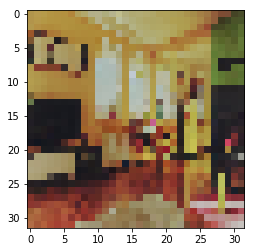

In [31]:
plt.show()

### CNN

In [25]:
tf.reset_default_graph()

In [26]:
x_image = tf.placeholder(dtype=tf.float32, shape=[1,32,32,3]) # 이미지 데이터의 경우 shape은 [number, height, width, channels] 순이다

In [27]:
with tf.name_scope("First_Layer") as scope: 
    w1 = tf.Variable(tf.random_normal(shape=[3,3,3,32], stddev=0.01), name = "W1") # shape !!!!!!!!!!
    L1 = tf.nn.conv2d(input= x_image, filter= w1, strides=[1,1,1,1], padding='SAME', name="L1")
    L1 = tf.nn.relu(L1)
    L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1],  strides= [1,2,2,1], padding='SAME')

In [28]:
with tf.name_scope("Second_Layer") as scope:  
    w2 = tf.Variable(tf.random_normal(shape=[3,3,32,64], stddev=0.01))
    L2 = tf.nn.conv2d(input= L1, filter= w2, strides=[1,1,1,1], padding='SAME') 
    L2 = tf.nn.relu(L2)
    L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1],  strides= [1,2,2,1], padding='SAME')

In [32]:
L2

<tf.Tensor 'Second_Layer/MaxPool:0' shape=(1, 8, 8, 64) dtype=float32>